In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/comb_clean_pitcher.csv', index_col=False)

In [3]:
df.head()

,player_name,pitcher,batter,stand,pitch_type,pitch_number,outs_when_up,times_faced,XBH,large_score_dif,recent_pitch,second_recent_pitch,third_recent_pitch,pitch_count
0,"Rodriguez, Grayson",680570,543760,R,FB,4,0,1,0,0,14.0 - SL - ball,2.0 - FB - foul,14.0 - FB - ball,2-1
1,"Rodriguez, Grayson",680570,543760,R,SL,5,0,1,0,0,9.0 - FB - called,14.0 - SL - ball,2.0 - FB - foul,2-2
2,"Rodriguez, Grayson",680570,543760,R,FB,6,0,1,0,0,14.0 - SL - ball,9.0 - FB - called,14.0 - SL - ball,3-2
3,"Rodriguez, Grayson",680570,608369,L,FB,4,0,1,0,0,14.0 - CH - ball,14.0 - CH - ball,4.0 - FB - called,2-1
4,"Rodriguez, Grayson",680570,608369,L,CH,5,0,1,0,0,3.0 - FB - foul,14.0 - CH - ball,14.0 - CH - ball,2-2


In [3]:
df.dropna(axis=0, inplace=True)

In [6]:
X = df.drop(columns=['player_name', 'pitcher', 'batter', 'pitch_type', 'pitch_number'])
y = df['pitch_type']

categorical_cols = ['stand', 'outs_when_up', 'times_faced', 'XBH',
       'large_score_dif', 'recent_pitch', 'second_recent_pitch',
       'third_recent_pitch', 'pitch_count']

In [11]:
X.columns

Index(['stand', 'outs_when_up', 'times_faced', 'XBH', 'large_score_dif',
       'recent_pitch', 'second_recent_pitch', 'third_recent_pitch',
       'pitch_count'],
      dtype='object')

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

In [7]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
dc = DummyClassifier(strategy='most_frequent')

In [15]:
dc.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [16]:
dc.score(X_test, y_test)

0.5474821397456002

In [17]:
# Create a column transformer to apply encoding only to the categorical columns
preprocessor = ColumnTransformer(transformers=
                                 [('cat', ohe, [0, 1, 2, 3, 4, 5, 6, 7, 8])],
                                 remainder='passthrough')

In [18]:
preprocessor.fit(X_train)

preprocessor.transform(X_train).shape

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(68867, 628)

In [14]:
preprocessor.transform(X_test).shape

(22956, 628)

In [15]:
pipe = Pipeline([('ct', preprocessor), ('dt', DecisionTreeClassifier())])

In [16]:
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9953969245066577

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X_train, y_train)

In [18]:
grid = {'dt__max_depth': [None, 20, 40, 60, 80, 100]}

In [8]:
from sklearn.model_selection import GridSearchCV

gs_pipe = GridSearchCV(estimator=pipe, param_grid=grid, verbose=2)
gs_pipe.fit(X_train, y_train)

gs_pipe.best_params_

gs_pipe.best_score_

gs_pipe.best_estimator_.score(X_train, y_train)

grid = {'dt__max_depth': [None, 20, 40, 60, 80, 100], 
        'dt__min_samples_split': [2, 3, 4, 5], 
        'dt__min_samples_leaf': [1, 2, 3, 4],
        'dt_min_impurity_decrease': [0, 1, 2, 3, 4]}

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_pipe = Pipeline([('ct', preprocessor), ('rf', RandomForestClassifier())])

In [22]:
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_train, y_train)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9953969245066577

In [23]:
cross_val_score(rf_pipe, X_train, y_train)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sk

array([0.52185277, 0.5262088 , 0.52907863, 0.52798954, 0.52297974])

In [24]:
rf_grid = {'rf__max_depth': [100], 
        'rf__min_samples_split': [2, 3, 4, 5], 
        'rf__min_samples_leaf': [1, 2, 3, 4],
        'rf__min_impurity_decrease': [0, 1, 2, 3, 4]}

In [27]:
rf_gs_pipe = GridSearchCV(estimator=rf_pipe, param_grid=rf_grid, verbose=2, cv=3)
rf_gs_pipe.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  22.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  22.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  22.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  21.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  21.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  21.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  21.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  22.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  21.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  20.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  20.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  20.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  16.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  17.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  16.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  16.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  17.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  16.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  16.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  16.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  16.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  16.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  16.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  16.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  15.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  15.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  15.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  14.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  15.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  15.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  15.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  13.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.6s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.5s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.4s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=None, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   7.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   7.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   7.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   7.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   7.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   7.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   7.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   7.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   7.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  11.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  12.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  12.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=40, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  14.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  14.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  14.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  14.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  14.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  14.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  12.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  12.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  12.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  12.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  12.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  12.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  12.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  13.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  12.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  12.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  13.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  12.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  12.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  12.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  12.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  12.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  12.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  12.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  12.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  12.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  12.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  12.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  12.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  12.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  12.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  11.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  11.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  12.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  12.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  11.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  11.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  12.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  12.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  12.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  11.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  11.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=60, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  17.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  17.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  17.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  16.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  16.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  16.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  16.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  16.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  16.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  15.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  16.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  16.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  13.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  14.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  14.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  13.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  13.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  13.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  13.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  13.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  13.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  13.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  12.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  13.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  13.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  13.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  13.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  13.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  12.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  12.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  13.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  12.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  18.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  20.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=  19.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  18.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  18.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=  18.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  17.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  17.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  17.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  17.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  17.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=  17.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  15.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  15.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=  14.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  15.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  16.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  15.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  15.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  15.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  15.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=  15.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  15.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  15.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  14.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  14.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  14.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=  14.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  13.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  14.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=  13.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  13.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  14.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=  13.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  13.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  13.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=  13.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  13.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  13.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=0, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=  13.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=1, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=2, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.2s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=3, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=1, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=2, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=3, rf__min_samples_split=5; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=2; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=3; total time=   1.3s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=4; total time=   1.7s
[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=100, rf__min_impurity_decrease=4, rf__min_samples_leaf=4, rf__min_samples_split=5; total time=   1.4s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 20, 40, 60, 80, 100],
                         'rf__min_impurity_decrease': [0, 1, 2, 3, 4],
                         'rf__min_samples_leaf': [1, 2, 3, 4],
                         'rf__min_samples_split': [2, 3, 4, 5]},
             verbose=2)

In [28]:
rf_gs_pipe.best_params_

{'rf__max_depth': 100,
 'rf__min_impurity_decrease': 0,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 5}

In [30]:
rf_gs_pipe.best_score_

0.5449925235232302

In [38]:
rf_gs_pipe.classes_

array(['CB', 'CH', 'FB', 'SL'], dtype=object)

In [40]:
y_test.value_counts()

pitch_type
FB    12568
SL     4616
CH     3203
CB     2569
Name: count, dtype: int64

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
rf_y_pred = rf_gs_pipe.predict(X_test)

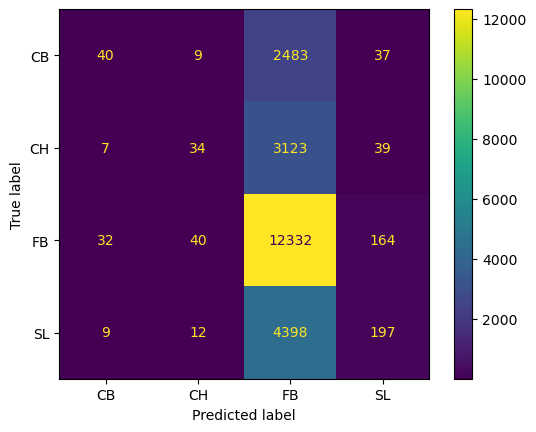

In [44]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cmdisplay = ConfusionMatrixDisplay(rf_cm, display_labels=rf_gs_pipe.classes_)
rf_cmdisplay.plot();

In [12]:
df_bi = df.copy()

In [13]:
def transform_pitch_types(column):
    """
    Transform specific pitch types in a column to 'OS'.
    'SL', 'CH', 'CB' are changed to 'OS', other values are left unchanged.

    Args:
    column (pd.Series): A pandas Series representing the column to be transformed.

    Returns:
    pd.Series: The transformed column.
    """
    # Mapping specific pitch types to 'OS'
    pitch_map = {'SL': 'OS', 'CH': 'OS', 'CB': 'OS'}

    # Using the map function to apply the transformation
    return column.map(lambda x: pitch_map.get(x, x))

In [14]:
df_bi['pitch_type'] = transform_pitch_types(df_bi['pitch_type'])

In [15]:
def transform_pitch_types_in_string(column):
    """
    Transform specific substrings in a column to 'OS'.
    Substrings 'SL', 'CH', 'CB' are changed to 'OS', other parts of the string are left unchanged.

    Args:
    column (pd.Series): A pandas Series representing the column to be transformed.

    Returns:
    pd.Series: The transformed column.
    """
    def replace_substring(pitch):
        # Replace specific substrings with 'OS'
        for sub in ['SL', 'CH', 'CB']:
            pitch = pitch.replace(sub, 'OS')
        return pitch

    return column.apply(replace_substring)

In [16]:
df_bi['recent_pitch'] = transform_pitch_types_in_string(df_bi['recent_pitch'])
df_bi['second_recent_pitch'] = transform_pitch_types_in_string(df_bi['second_recent_pitch'])
df_bi['third_recent_pitch'] = transform_pitch_types_in_string(df_bi['third_recent_pitch'])

In [17]:
X_bi = df_bi.drop(columns=['player_name', 'pitcher', 'batter', 'pitch_type', 'pitch_number'])
y_bi = df_bi['pitch_type']

In [13]:
X_bi.columns

Index(['stand', 'outs_when_up', 'times_faced', 'XBH', 'large_score_dif',
       'recent_pitch', 'second_recent_pitch', 'third_recent_pitch',
       'pitch_count'],
      dtype='object')

In [18]:
# Initialize OneHotEncoder
ohe_bi = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

# Split the encoded data into training and testing sets
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(X_bi, y_bi, random_state=42)

In [15]:
categorical_features = X_bi.columns.tolist()

In [16]:
preprocessor_bi = ColumnTransformer(transformers=
                                 [('cat', ohe, [0, 1, 2, 3, 4, 5, 6, 7, 8])],
                                 remainder='passthrough')

NameError: name 'ohe' is not defined

In [70]:
preprocessor_bi.fit(X_train_bi)
X_train_transformed = preprocessor_bi.transform(X_train_bi)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
rf_pipe_bi = Pipeline([('ct', preprocessor_bi), ('rf', RandomForestClassifier())])
rf_pipe_bi.fit(X_train_transformed, y_train_bi)
rf_pipe_bi.score(X_train_transformed, y_train_bi)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9913456372428013

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [42]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameter values
param_dist = {
    'rf__n_estimators': sp_randint(100, 1000),
    'rf__max_depth': [None] + list(range(5, 50)),
    'rf__min_samples_split': sp_randint(2, 11),
    'rf__min_samples_leaf': sp_randint(1, 11)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_pipe_bi, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=2, n_jobs=4)

# Fit RandomizedSearchCV
random_search.fit(X_train_transformed, y_train_bi)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sk

[CV] END rf__max_depth=42, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=800; total time= 2.3min
[CV] END rf__max_depth=24, rf__min_samples_leaf=7, rf__min_samples_split=4, rf__n_estimators=314; total time=  42.9s
[CV] END rf__max_depth=14, rf__min_samples_leaf=8, rf__min_samples_split=6, rf__n_estimators=199; total time=  19.4s
[CV] END rf__max_depth=14, rf__min_samples_leaf=8, rf__min_samples_split=6, rf__n_estimators=199; total time=  19.6s
[CV] END rf__max_depth=14, rf__min_samples_leaf=8, rf__min_samples_split=6, rf__n_estimators=199; total time=  19.6s
[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=4, rf__n_estimators=761; total time= 2.2min
[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=4, rf__n_estimators=761; total time= 2.2min
[CV] END rf__max_depth=47, rf__min_samples_leaf=9, rf__min_samples_split=2, rf__n_estimators=574; total time= 1.7min
[CV] END rf__max_depth=45, rf__min_samples_leaf=3, rf__min_sampl

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rf__max_depth=42, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=800; total time= 2.3min
[CV] END rf__max_depth=24, rf__min_samples_leaf=7, rf__min_samples_split=4, rf__n_estimators=314; total time=  42.6s
[CV] END rf__max_depth=24, rf__min_samples_leaf=7, rf__min_samples_split=4, rf__n_estimators=314; total time=  42.5s
[CV] END rf__max_depth=14, rf__min_samples_leaf=8, rf__min_samples_split=6, rf__n_estimators=199; total time=  19.7s
[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=4, rf__n_estimators=761; total time= 2.2min
[CV] END rf__max_depth=5, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=485; total time=  21.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=485; total time=  21.5s
[CV] END rf__max_depth=24, rf__min_samples_leaf=1, rf__min_samples_split=7, rf__n_estimators=352; total time=  49.4s
[CV] END rf__max_depth=24, rf__min_samples_leaf=1, rf__min_samples

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sk

[CV] END rf__max_depth=42, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=800; total time= 2.3min
[CV] END rf__max_depth=24, rf__min_samples_leaf=7, rf__min_samples_split=4, rf__n_estimators=314; total time=  42.7s
[CV] END rf__max_depth=24, rf__min_samples_leaf=7, rf__min_samples_split=4, rf__n_estimators=314; total time=  42.8s
[CV] END rf__max_depth=14, rf__min_samples_leaf=8, rf__min_samples_split=6, rf__n_estimators=199; total time=  19.6s
[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=4, rf__n_estimators=761; total time= 2.2min
[CV] END rf__max_depth=5, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=485; total time=  21.5s
[CV] END rf__max_depth=5, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=485; total time=  21.6s
[CV] END rf__max_depth=24, rf__min_samples_leaf=1, rf__min_samples_split=7, rf__n_estimators=352; total time=  49.6s
[CV] END rf__max_depth=24, rf__min_samples_leaf=1, rf__min_samples

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=42, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=800; total time= 2.3min
[CV] END rf__max_depth=42, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=800; total time= 2.4min
[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=4, rf__n_estimators=761; total time= 2.2min
[CV] END rf__max_depth=5, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=485; total time=  21.4s
[CV] END rf__max_depth=24, rf__min_samples_leaf=1, rf__min_samples_split=7, rf__n_estimators=352; total time=  49.6s
[CV] END rf__max_depth=47, rf__min_samples_leaf=9, rf__min_samples_split=2, rf__n_estimators=574; total time= 1.7min
[CV] END rf__max_depth=47, rf__min_samples_leaf=9, rf__min_samples_split=2, rf__n_estimators=574; total time= 1.7min
[CV] END rf__max_depth=6, rf__min_samples_leaf=5, rf__min_samples_split=4, rf__n_estimators=746; total time=  37.7s
[CV] END rf__max_depth=6, rf__min_samples_leaf=5, rf__min_samples_

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=515; total time=  23.0s
[CV] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=515; total time=  22.9s
[CV] END rf__max_depth=7, rf__min_samples_leaf=7, rf__min_samples_split=9, rf__n_estimators=222; total time=  13.2s
[CV] END rf__max_depth=20, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=936; total time= 1.9min
[CV] END rf__max_depth=37, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=610; total time= 1.7min
[CV] END rf__max_depth=37, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=610; total time= 1.7min
[CV] END rf__max_depth=9, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=863; total time= 1.0min
[CV] END rf__max_depth=39, rf__min_samples_leaf=3, rf__min_samples_split=4, rf__n_estimators=610; total time= 1.8min
[CV] END rf__max_depth=22, rf__min_samples_leaf=4, rf__min_samples_s

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sk

[CV] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=515; total time=  22.9s
[CV] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=515; total time=  22.7s
[CV] END rf__max_depth=7, rf__min_samples_leaf=7, rf__min_samples_split=9, rf__n_estimators=222; total time=  13.1s
[CV] END rf__max_depth=20, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=936; total time= 1.9min
[CV] END rf__max_depth=20, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=936; total time= 1.9min
[CV] END rf__max_depth=19, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=223; total time=  27.2s
[CV] END rf__max_depth=19, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=223; total time=  27.5s
[CV] END rf__max_depth=19, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=223; total time=  27.9s
[CV] END rf__max_depth=9, rf__min_samples_leaf=3, rf__min_sample

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=42, rf__min_samples_leaf=2, rf__min_samples_split=9, rf__n_estimators=740; total time= 2.3min
[CV] END rf__max_depth=14, rf__min_samples_leaf=9, rf__min_samples_split=10, rf__n_estimators=250; total time=  24.1s
[CV] END rf__max_depth=14, rf__min_samples_leaf=9, rf__min_samples_split=10, rf__n_estimators=250; total time=  23.6s
[CV] END rf__max_depth=34, rf__min_samples_leaf=10, rf__min_samples_split=4, rf__n_estimators=362; total time=  57.5s
[CV] END rf__max_depth=19, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=671; total time= 1.3min
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=136; total time=   6.9s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=136; total time=   7.0s
[CV] END rf__max_depth=35, rf__min_samples_leaf=7, rf__min_samples_split=10, rf__n_estimators=332; total time=  55.3s
[CV] END rf__max_depth=35, rf__min_samples_leaf=7, rf__min_s

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sk

[CV] END rf__max_depth=42, rf__min_samples_leaf=2, rf__min_samples_split=9, rf__n_estimators=740; total time= 2.2min
[CV] END rf__max_depth=42, rf__min_samples_leaf=2, rf__min_samples_split=9, rf__n_estimators=740; total time= 2.3min
[CV] END rf__max_depth=34, rf__min_samples_leaf=10, rf__min_samples_split=4, rf__n_estimators=362; total time=  58.2s
[CV] END rf__max_depth=19, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=671; total time= 1.3min
[CV] END rf__max_depth=19, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=671; total time= 1.3min
[CV] END rf__max_depth=35, rf__min_samples_leaf=7, rf__min_samples_split=10, rf__n_estimators=332; total time=  53.5s
[CV] END rf__max_depth=38, rf__min_samples_leaf=3, rf__min_samples_split=4, rf__n_estimators=503; total time= 1.4min
[CV] END rf__max_depth=27, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=772; total time= 1.9min
[CV] END rf__max_depth=27, rf__min_samples_leaf=4, rf__min

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sk

({'rf__max_depth': 47,
  'rf__min_samples_leaf': 8,
  'rf__min_samples_split': 9,
  'rf__n_estimators': 162},
 0.5970639742272627)

[CV] END rf__max_depth=44, rf__min_samples_leaf=1, rf__min_samples_split=9, rf__n_estimators=739; total time= 2.3min
[CV] END rf__max_depth=42, rf__min_samples_leaf=2, rf__min_samples_split=9, rf__n_estimators=740; total time= 2.3min
[CV] END rf__max_depth=34, rf__min_samples_leaf=10, rf__min_samples_split=4, rf__n_estimators=362; total time=  57.2s
[CV] END rf__max_depth=34, rf__min_samples_leaf=10, rf__min_samples_split=4, rf__n_estimators=362; total time= 1.0min
[CV] END rf__max_depth=19, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=671; total time= 1.3min
[CV] END rf__max_depth=35, rf__min_samples_leaf=7, rf__min_samples_split=10, rf__n_estimators=332; total time=  54.7s
[CV] END rf__max_depth=38, rf__min_samples_leaf=3, rf__min_samples_split=4, rf__n_estimators=503; total time= 1.5min
[CV] END rf__max_depth=27, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=772; total time= 1.8min
[CV] END rf__max_depth=27, rf__min_samples_leaf=6, rf__min_

In [43]:
best_score

0.5970639742272627

In [44]:
best_params

{'rf__max_depth': 47,
 'rf__min_samples_leaf': 8,
 'rf__min_samples_split': 9,
 'rf__n_estimators': 162}

In [79]:
rf_1 = RandomForestClassifier(n_estimators=162, max_depth=47, min_samples_split=9, min_samples_leaf=8)
rf_1.fit(X_train_transformed, y_train_bi)

RandomForestClassifier(max_depth=47, min_samples_leaf=8, min_samples_split=9,
                       n_estimators=162)

In [80]:
X_test_transformed = preprocessor_bi.transform(X_test_bi)

In [82]:
y_pred_bi = rf_1.predict(X_test_transformed)

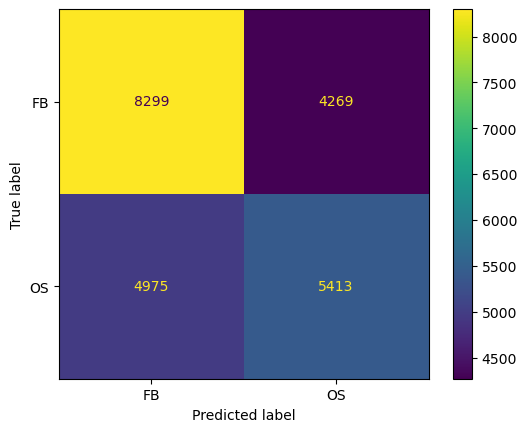

In [83]:
cm = confusion_matrix(y_test_bi, y_pred_bi)
ConfusionMatrixDisplay(cm, display_labels=rf_pipe_bi.classes_).plot()

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test_bi, y_pred_bi)

0.5973166056804321

In [92]:
param_grid_rf_bi = {
    'rf__max_depth': [43, 45, 47, 49, 51],  # Best is 47, so you explore a few values around it
    'rf__min_samples_leaf': [6, 8, 10],  # Best is 8
    'rf__min_samples_split': [7, 9, 11],  # Best is 9
    'rf__n_estimators': [160, 162, 164]  # Best is 162, explore close values
}

In [20]:
preprocessor_bi2 = ColumnTransformer(transformers=
                                 [('cat', ohe_bi, [0, 1, 2, 3, 4, 5, 6, 7, 8])],
                                 remainder='passthrough')

In [21]:
X_train_transformed2 = preprocessor_bi2.fit_transform(X_train_bi)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [95]:
rf_pipe_bi2 = Pipeline([('ct', preprocessor_bi2), ('rf', RandomForestClassifier())])
rf_pipe_bi2 = rf_pipe_bi2.fit(X_train_transformed2, y_train_bi)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
gs_rf_bi2 = GridSearchCV(estimator=rf_pipe_bi2, param_grid=param_grid_rf_bi, cv=3, verbose=2)
gs_rf_bi2.fit(X_train_bi, y_train_bi)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=   9.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=43, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=45, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=47, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=49, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=160; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=6, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=160; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=162; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=8, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=7, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=160; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=9, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=160; total time=  10.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=162; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  11.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=51, rf__min_samples_leaf=10, rf__min_samples_split=11, rf__n_estimators=164; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False,
                                                                                       sparse_output=False),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [43, 45, 47, 49, 51],
                         'rf__min_samples_leaf': [6, 8, 10],
                         'rf__min_samples_split': [7, 9, 11],
                         'rf__n_estimators': [160, 162, 164]},
             verbose=2)

In [98]:
gs_rf_bi2.best_score_

0.5960184245720573

In [99]:
gs_rf_bi2.best_params_

{'rf__max_depth': 47,
 'rf__min_samples_leaf': 6,
 'rf__min_samples_split': 9,
 'rf__n_estimators': 164}

In [103]:
rf2 = RandomForestClassifier(n_estimators=164, max_depth=47, min_samples_split=9, min_samples_leaf=6)
rf2.fit(X_train_transformed2, y_train_bi)

RandomForestClassifier(max_depth=47, min_samples_leaf=6, min_samples_split=9,
                       n_estimators=164)

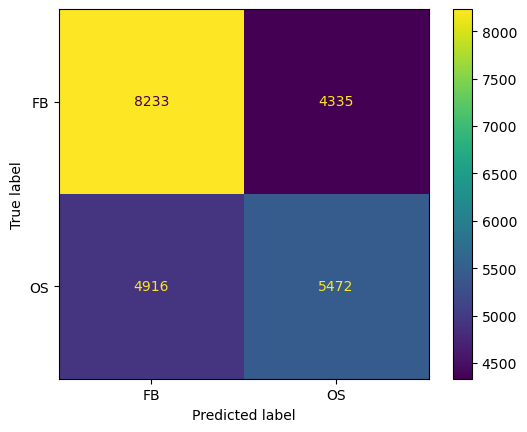

In [104]:
y_pred_bi2 = rf2.predict(X_test_transformed)
cm = confusion_matrix(y_test_bi, y_pred_bi2)
ConfusionMatrixDisplay(cm, display_labels=rf_pipe_bi.classes_).plot()

In [105]:
accuracy_score(y_test_bi, y_pred_bi2)

0.5970116745077539

In [106]:
y_pred_train = rf2.predict(X_train_transformed2)

In [107]:
accuracy_score(y_train_bi, y_pred_train)

0.6457229151843409

In [22]:
from sklearn.neural_network import MLPClassifier

In [21]:
mlp_pipe = Pipeline([('ct', preprocessor_bi2), ('mlp', MLPClassifier(solver='sgd', max_iter=1000, verbose=2, tol=1e-5))])
mlp_pipe.fit(X_train_bi, y_train_bi)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Input contains NaN

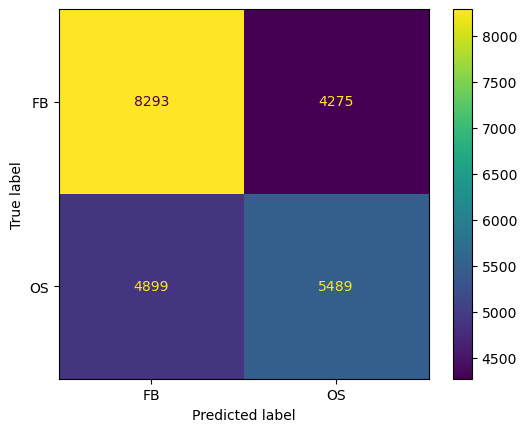

In [121]:
mlp_y_pred = mlp_pipe.predict(X_test_bi)
mlp_cm = confusion_matrix(y_test_bi, mlp_y_pred)
ConfusionMatrixDisplay(mlp_cm, display_labels=mlp_pipe.classes_).plot()

In [122]:
accuracy_score(y_test_bi, mlp_y_pred)

0.6003659174072138

In [25]:
mlp_gs = MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'tol': [1e-4, 1e-5, 1e-6]
}
clf = RandomizedSearchCV(estimator=mlp_gs, param_distributions=parameter_space, cv=5, verbose=2, n_jobs=-1)
clf.fit(X_train_transformed2, y_train_bi) # X is train samples and y is the corresponding labels

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reac

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, tol=1e-06; total time= 4.3min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, tol=0.0001; total time=  53.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, tol=0.0001; total time=  45.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, tol=1e-05; total time= 5.2min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, tol=0.0001; total time= 6.0min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, tol=1e-06; total time= 6.2min


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(10, 30, 10),
                                                               (20,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam'],
                                        'tol': [0.0001, 1e-05, 1e-06]},
                   verbose=2)

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, tol=1e-06; total time= 4.3min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, tol=0.0001; total time=  57.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, tol=0.0001; total time=  55.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, tol=1e-05; total time= 5.2min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, tol=0.0001; total time= 6.9min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, tol=1e-06; total time= 5.8min
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, tol=1e-06; total time= 4.3min
[CV] END activation=relu, alpha=0.0001, hidden_lay

In [26]:
clf.best_score_

0.6017976356267443

In [27]:
clf.best_params_

{'tol': 1e-06,
 'solver': 'sgd',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (10, 30, 10),
 'alpha': 0.05,
 'activation': 'tanh'}

In [47]:
mlp2 = (MLPClassifier(tol= 1e-06, solver='sgd', learning_rate='constant', 
                                  hidden_layer_sizes=(10, 30, 10), alpha=0.05, activation='tanh')
            )
mlp2.fit(X_train_transformed2, y_train_bi)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              solver='sgd', tol=1e-06)

In [ ]:
mlp_pipe2 = mlp_pipe2.transform(X_train_transformed2)

In [48]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

In [53]:
X_test_bi_transformed = preprocessor_bi2.transform(X_test_bi)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


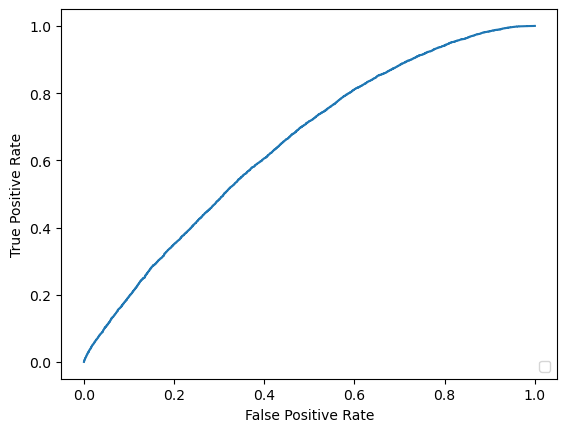

In [55]:
y_score_mlp = clf.predict_proba(X_test_bi_transformed)[:, 1]

fpr, tpr, _ = roc_curve(y_test_bi, y_score_mlp, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot();

In [77]:
rf_pipe_bi = Pipeline([('ct', preprocessor_bi), ('rf', RandomForestClassifier())])

In [79]:
rf_pipe_bi.fit(X_train, y_train)
rf_pipe_bi.score(X_train, y_train)

/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9913456372428013

In [80]:
rf_grid_bi = {'rf__max_depth': [80, 155, 230, 305], 
        'rf__min_samples_split': [4, 6, 10, 12], 
        'rf__min_samples_leaf': [1, 2, 3, 4],
        'rf__min_impurity_decrease': [0, 1, 2, 3, 4]}

In [81]:
rf_gs_pipe_bi = GridSearchCV(estimator=rf_pipe_bi, param_grid=rf_grid_bi, verbose=2, cv=3)
rf_gs_pipe_bi.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  11.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  11.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=4; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=6; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=6; total time=  10.8s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=6; total time=  10.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=10; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=10; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=10; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=12; total time=  10.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=12; total time=  10.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=1, rf__min_samples_split=12; total time=   9.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=   9.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  10.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=4; total time=  10.0s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=6; total time=   9.5s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=6; total time=   9.4s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=6; total time=   9.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=10; total time=   9.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=10; total time=   9.6s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=10; total time=  10.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=12; total time=   9.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=12; total time=   9.7s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=2, rf__min_samples_split=12; total time=   9.3s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   9.1s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   9.2s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rf__max_depth=80, rf__min_impurity_decrease=0, rf__min_samples_leaf=3, rf__min_samples_split=4; total time=   8.9s


/Users/nathan/opt/anaconda3/envs/learn-env-test/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyboardInterrupt: 